<p align='center'><b>Imports</b></p>

In [ ]:
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from copy import deepcopy

<p align='center'><b>Reading the dataset</b></p>

In [ ]:
df = pd.read_csv('births-deaths.csv')

<p align='center'><b>Categorizing according to Nations</b></p>

In [ ]:
"""
Nations: => Indians, Malayas, Chinese
"""
chinese_df = df.loc[df['ethnic_group'] == 'Chinese']
indians_df = df.loc[df['ethnic_group'] == 'Indians']
malays_df = df.loc[df['ethnic_group'] == 'Malays']

<p align='center'><b>Normalizing Chinese Data</b></p>

In [ ]:
"""
******* Chinese *******
"""

with open('chinese.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Year", "X_Axis", "Births", "Deaths"])
ch = pd.read_csv('chinese.csv')

years = []
for i in chinese_df['year']:
  years.append(i)

births_chinese = []
for i in chinese_df['live_births']:
  births_chinese.append(i)

deaths_chinese = []
for i in chinese_df['deaths']:
  deaths_chinese.append(i)

# normalizing births and deaths

numpy_births = np.array(births_chinese)
min = np.amin(numpy_births)
max = np.amax(numpy_births)
for i in range(len(births_chinese)):
  births_chinese[i] = (numpy_births[i] - min) / (max - min)

numpy_deaths = np.array(deaths_chinese)
min = np.amin(numpy_deaths)
max = np.amax(numpy_deaths)
for i in range(len(deaths_chinese)):
  deaths_chinese[i] = (numpy_deaths[i] - min) / (max - min)

years = pd.Series(years)
ch['Year'] = years

births_chinese = pd.Series(births_chinese)
ch['Births'] = births_chinese
deaths_chinese = pd.Series(deaths_chinese)
ch['Deaths'] = deaths_chinese

chinese_birth_target = list(ch['Births'])
chinese_death_target = list(ch['Deaths'])

<p align='center'><b>Normalizing Indians Data</b></p>

In [ ]:
"""
****** Indians *******
"""
with open('indians.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Year", "X_Axis", "Births", "Deaths"])
indians = pd.read_csv('indians.csv')

births_indians = []
for i in indians_df['live_births']:
  births_indians.append(i)

deaths_indians = []
for i in indians_df['deaths']:
  deaths_indians.append(i)

# normalizing births and deaths

numpy_births = np.array(births_indians)
min = np.amin(numpy_births)
max = np.amax(numpy_births)
for i in range(len(births_indians)):
  births_indians[i] = (numpy_births[i] - min) / (max - min)

numpy_deaths = np.array(deaths_indians)
min = np.amin(numpy_deaths)
max = np.amax(numpy_deaths)
for i in range(len(deaths_indians)):
  deaths_indians[i] = (numpy_deaths[i] - min) / (max - min)

years = pd.Series(years)
indians['Year'] = years

births_indians = pd.Series(births_indians)
indians['Births'] = births_indians
deaths_indians = pd.Series(deaths_indians)
indians['Deaths'] = deaths_indians

indians_birth_target = list(indians['Births'])
indians_death_target = list(indians['Deaths'])

<p align='center'><b>Normalizing Malays Data</b></p>

In [ ]:
"""
****** Malays *******
"""
with open('malays.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Year", "X_Axis", "Births", "Deaths"])
malays = pd.read_csv('malays.csv')

births_malays = []
for i in malays_df['live_births']:
  births_malays.append(i)

deaths_malays = []
for i in malays_df['deaths']:
  deaths_malays.append(i)


# normalizing births and deaths

numpy_births = np.array(births_malays)
min = np.amin(numpy_births)
max = np.amax(numpy_births)
for i in range(len(births_malays)):
  births_malays[i] = (numpy_births[i] - min) / (max - min)


numpy_deaths = np.array(deaths_malays)
min = np.amin(numpy_deaths)
max = np.amax(numpy_deaths)
for i in range(len(deaths_malays)):
  deaths_malays[i] = (numpy_deaths[i] - min) / (max - min)

years = pd.Series(years)
malays['Year'] = years

births_malays = pd.Series(births_malays)
malays['Births'] = births_malays
deaths_malays = pd.Series(deaths_malays)
malays['Deaths'] = deaths_malays

malays_birth_target = list(malays['Births'])
malays_death_target = list(malays['Deaths'])

<p align='center'><b>Normalizing x axis</b></p>

In [ ]:
"""
Normalizing X_Axis
"""
x_axis = []
for i in range(0, len(chinese_df['year'])):
  x_axis.append((i+1))

numpy_x_axis = np.array(x_axis)
min_x = np.amin(numpy_x_axis)
max_x = np.amax(numpy_x_axis)


for i in range(len(ch['X_Axis'])):
  x_axis[i] = (numpy_x_axis[i] - min_x) / (max_x - min_x)

x_axis = pd.Series(x_axis)
ch['X_Axis'] = x_axis
indians['X_Axis'] = x_axis
malays['X_Axis'] = x_axis

<p align='center'><b>Implementing Genetic Algortihm</p>

In [ ]:
def initial_population(degree: int, count: int):
    coefficients = []
    for i in range(count):
        cols = []
        for j in range(degree+1):
            rand = random.uniform(0, 1)
            cols.append(rand)
        coefficients.append(cols)
    return coefficients

#----------------------------------

def crossover(coefficients: list):
    offsprings = []

    random_father = random.sample(range(0, len(coefficients)), len(coefficients))
    random_mother = random.sample(range(0, len(coefficients)), len(coefficients))

    point = int(len(coefficients[0]) / 2)
    for i in range(0, len(random_father)):
      new_genes = []
      father = (coefficients[random_father[i]][0:point])[::]
      mother = (coefficients[random_mother[i]][point:])[::]
      new_genes.append(father + mother)
      offsprings.append(new_genes)
    
    result = []
    for i in offsprings:
      for j in i:
        result.append(j)
    return result
#----------------------------------

def mutation(coefficients: list):
    random_positions = random.sample(range(len(coefficients)), int(len(coefficients)/5))

    for i in range(0, len(random_positions)):
      for j in range(0, len(coefficients[0])):
        rand = random.uniform(0, 1)
        add_or_minus = random.randint(0, 1)
        if add_or_minus == 1:
            plus_rand = deepcopy(coefficients[i][j] + rand)
            if -1 <= plus_rand <= 1:
              coefficients[i][j] = deepcopy(plus_rand)
        else:
            minus_rand = deepcopy(coefficients[i][j] - rand)
            if -1 <= minus_rand <= 1:
              coefficients[i][j] = deepcopy(minus_rand)
    return coefficients
#----------------------------------

def calc_fitness(population: list, target: list):
    error_values = []
    polynomials = []
    
    for i in range(len(population)):
      polynomials.append(np.poly1d(population[i]))
    
    poly_values = []
    for i in range(len(population)):
      values = []
      for j in range(len(target)):
        values.append((polynomials[i])(x_axis[j]))
      poly_values.append(values)

    for i in range(len(polynomials)):
      single_error = 0
      for j in range(len(target)):
        single_error += abs(poly_values[i][j] - target[j])
      error_values.append([single_error])
  
    return population, error_values

#----------------------------------

def choose_survivals(population: list, error_values: list):
    pop_with_error = []
    for i in range(0, len(population)):
        pop_with_error.append(error_values[i] + population[i])
        
    pop_with_error.sort(key=lambda x: x[0])

    for i in range(0, int(len(pop_with_error)/5)):
      pop_with_error.pop()
    
    
    next_generation = []
    for i in range(0, len(pop_with_error)):
      next_generation.append(pop_with_error[i][1:])

    return next_generation

#-------------------------------------

if __name__ == '__main__':
  chinese_birth_pop = initial_population(4, 1000)
  chinese_death_pop = initial_population(4, 1000)

  indians_birth_pop = initial_population(4, 1000)
  indians_death_pop = initial_population(4, 1000)

  malays_birth_pop = initial_population(4, 1000)
  malays_death_pop = initial_population(4, 1000)

  for i in range(2500):
    # Chinese Births
    chinese_birth_pop = crossover(chinese_birth_pop)
    chinese_birth_pop = mutation(chinese_birth_pop)
    chinese_birth_pop, err_chinese_birth = calc_fitness(chinese_birth_pop, chinese_birth_target)
    chinese_birth_pop = choose_survivals(chinese_birth_pop, err_chinese_birth)

    # Chinese Deaths
    chinese_death_pop = crossover(chinese_death_pop)
    chinese_death_pop = mutation(chinese_death_pop)
    chinese_death_pop, err_chinese_death = calc_fitness(chinese_death_pop, chinese_death_target)
    chinese_death_pop = choose_survivals(chinese_death_pop, err_chinese_death)


    # Indians Births
    indians_birth_pop = crossover(indians_birth_pop)
    indians_birth_pop = mutation(indians_birth_pop)
    indians_birth_pop, err_indians_birth = calc_fitness(indians_birth_pop, indians_birth_target)
    indians_birth_pop = choose_survivals(indians_birth_pop, err_indians_birth)

    # Indians Deaths
    indians_death_pop = crossover(indians_death_pop)
    indians_death_pop = mutation(indians_death_pop)
    indians_death_pop, err_indians_death = calc_fitness(indians_death_pop, indians_death_target)
    indians_death_pop = choose_survivals(indians_death_pop, err_indians_death)


    # Malays Births
    malays_birth_pop = crossover(malays_birth_pop)
    malays_birth_pop = mutation(malays_birth_pop)
    malays_birth_pop, err_malays_birth = calc_fitness(malays_birth_pop, malays_birth_target)
    malays_birth_pop = choose_survivals(malays_birth_pop, err_malays_birth)


    # Malays Deaths
    malays_death_pop = crossover(malays_death_pop)
    malays_death_pop = mutation(malays_death_pop)
    malays_death_pop, err_malays_death = calc_fitness(malays_death_pop, malays_death_target)
    malays_death_pop = choose_survivals(malays_death_pop, err_malays_death)

<p align='center'><b>Results and Data Denormalization</b></p>

In [ ]:
"""
**** Chinese Nation
"""
# Chinese Birth

chinese_birth_results = np.polyval(chinese_birth_pop[0], ch['X_Axis'])

numpy_targets = np.array(chinese_birth_results)
min_t = np.amin(numpy_targets)
max_t = np.amax(numpy_targets)
for i in range(len(chinese_birth_results)):
  chinese_birth_results[i] = (numpy_targets[i] - min_t) / (max_t - min_t)

ch_b_t = []
for i in chinese_df['live_births']:
  ch_b_t.append(i)

for i in range(len(ch_b_t)):
  chinese_birth_results[i] = chinese_birth_results[i] * (np.amax(ch_b_t) - np.amin(ch_b_t)) + np.amin(ch_b_t)

# Chinese Death

chinese_death_results = np.polyval(chinese_death_pop[0], ch['X_Axis'])

numpy_targets = np.array(chinese_death_results)
min_t = np.amin(numpy_targets)
max_t = np.amax(numpy_targets)
for i in range(len(chinese_death_results)):
  chinese_death_results[i] = (numpy_targets[i] - min_t) / (max_t - min_t)

ch_d_t = []
for i in chinese_df['deaths']:
  ch_d_t.append(i)

for i in range(len(ch_d_t)):
  chinese_death_results[i] = chinese_death_results[i] * (np.amax(ch_d_t) - np.amin(ch_d_t)) + np.amin(ch_d_t) 

"""
**** Indians Nation
"""

# Indians Birth

indians_birth_results = np.polyval(indians_birth_pop[0], indians['X_Axis'])

numpy_targets = np.array(indians_birth_results)
min_t = np.amin(numpy_targets)
max_t = np.amax(numpy_targets)
for i in range(len(indians_birth_results)):
  indians_birth_results[i] = (numpy_targets[i] - min_t) / (max_t - min_t)

in_b_t = []
for i in indians_df['live_births']:
  in_b_t.append(i)

for i in range(len(in_b_t)):
  indians_birth_results[i] = indians_birth_results[i] * (np.amax(in_b_t) - np.amin(in_b_t)) + np.amin(in_b_t)


# Indians Death

indians_death_results = np.polyval(indians_death_pop[0], indians['X_Axis'])

numpy_targets = np.array(indians_death_results)
min_t = np.amin(numpy_targets)
max_t = np.amax(numpy_targets)
for i in range(len(indians_death_results)):
  indians_death_results[i] = (numpy_targets[i] - min_t) / (max_t - min_t)

in_d_t = []
for i in indians_df['deaths']:
  in_d_t.append(i)

for i in range(len(in_d_t)):
  indians_death_results[i] = indians_death_results[i] * (np.amax(in_d_t) - np.amin(in_d_t)) + np.amin(in_d_t)

"""
**** Malays Nation
"""

# Malays Birth

malays_birth_results = np.polyval(malays_birth_pop[0], malays['X_Axis'])

numpy_targets = np.array(malays_birth_results)
min_t = np.amin(numpy_targets)
max_t = np.amax(numpy_targets)
for i in range(len(malays_birth_results)):
  malays_birth_results[i] = (numpy_targets[i] - min_t) / (max_t - min_t)

ml_b_t = []
for i in malays_df['live_births']:
  ml_b_t.append(i)

for i in range(len(ml_b_t)):
  malays_birth_results[i] = malays_birth_results[i] * (np.amax(ml_b_t) - np.amin(ml_b_t)) + np.amin(ml_b_t)

# Malays Death

malays_death_results = np.polyval(malays_death_pop[0], malays['X_Axis'])

numpy_targets = np.array(malays_death_results)
min_t = np.amin(numpy_targets)
max_t = np.amax(numpy_targets)
for i in range(len(malays_death_results)):
  malays_death_results[i] = (numpy_targets[i] - min_t) / (max_t - min_t)

ml_d_t = []
for i in malays_df['deaths']:
  ml_d_t.append(i)

for i in range(len(ml_d_t)):
  malays_death_results[i] = malays_death_results[i] * (np.amax(ml_d_t) - np.amin(ml_d_t)) + np.amin(ml_d_t)

<p align='center'><b>Chinese Birth Plot</b></p>

Text(0, 0.5, 'Population')

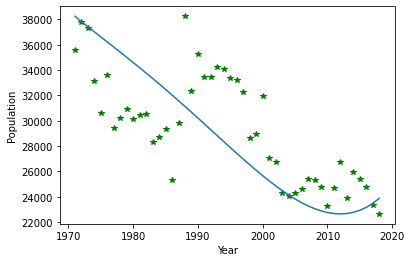

In [ ]:
plt.plot(ch['Year'], chinese_df['live_births'], '*', color='g')
plt.plot(ch['Year'], chinese_birth_results)
plt.xlabel('Year')
plt.ylabel('Population')

<p align='center'><b>Chinese Death Plot</b></p>

Text(0, 0.5, 'Population')

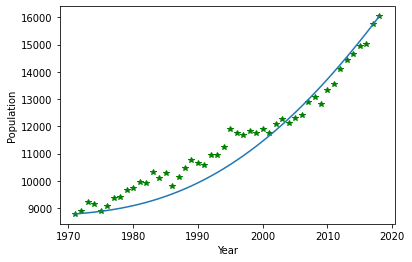

In [ ]:
plt.plot(ch['Year'], chinese_df['deaths'], '*', color='g')
plt.plot(ch['Year'], chinese_death_results)
plt.xlabel('Year')
plt.ylabel('Population')

<p align='center'><b>Indians Birth Plot</b></p>

Text(0, 0.5, 'Population')

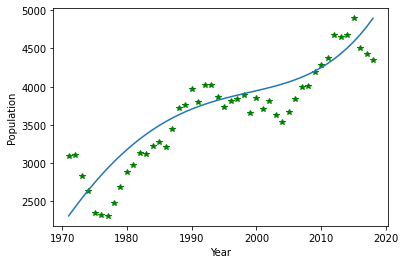

In [ ]:
plt.plot(indians['Year'], indians_df['live_births'], '*', color='g')
plt.plot(indians['Year'], indians_birth_results)
plt.xlabel('Year')
plt.ylabel('Population')

<p align='center'><b>Indians Death Plot</b></p>

Text(0, 0.5, 'Population')

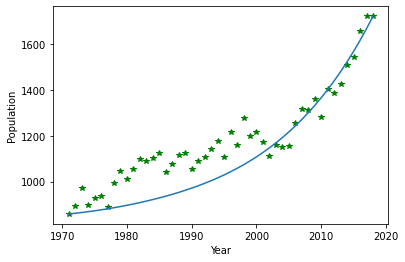

In [ ]:
plt.plot(indians_df['year'], indians_df['deaths'], '*' , color='g')
plt.plot(indians_df['year'], indians_death_results)
plt.xlabel('Year')
plt.ylabel('Population')

<p align='center'><b>Malays Birth Plot</b></p>

Text(0, 0.5, 'Population')

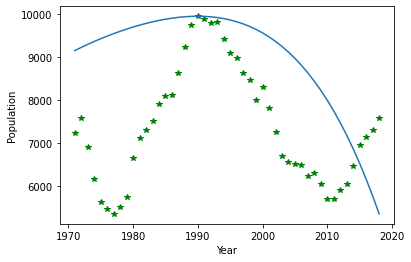

In [ ]:
plt.plot(malays_df['year'], malays_df['live_births'], '*', color='g')
plt.plot(malays_df['year'], malays_birth_results)
plt.xlabel('Year')
plt.ylabel('Population')

<p align='center'><b>Malays Death Plot</b></p>

Text(0, 0.5, 'Population')

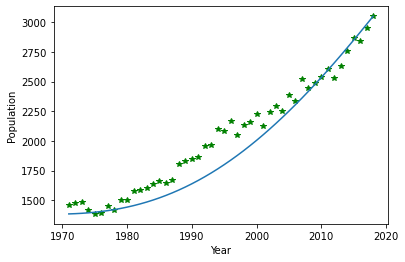

In [ ]:
plt.plot(malays_df['year'], malays_df['deaths'], '*',color='g')
plt.plot(malays_df['year'], malays_death_results)
plt.xlabel('Year')
plt.ylabel('Population')